### Size or Location: What influences house prices in Mexico?

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

Import Data

In [105]:
df = pd.read_csv("data/mexico-real-estate-clean.csv")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


#### Research Question 1: Which state has the most expensive real estate market?

In [106]:
"""Mean price by state""" 
mean_price_by_state = df.groupby("state")["price_usd"].mean()

print("Mean price by state type:", type(mean_price_by_state))
print("Mean price by state shape:", type(mean_price_by_state))
mean_price_by_state.sort_values().head(10)

Mean price by state type: <class 'pandas.core.series.Series'>
Mean price by state shape: <class 'pandas.core.series.Series'>


state
Oaxaca             59681.585000
Baja California    63152.431724
Colima             65786.646000
Tlaxcala           72921.818333
Zacatecas          76395.400000
Durango            78034.511429
Tabasco            82763.587000
Nayarit            87378.605556
San Luis Potosí    92435.540364
Tamaulipas         93713.385833
Name: price_usd, dtype: float64

State mean bar chart

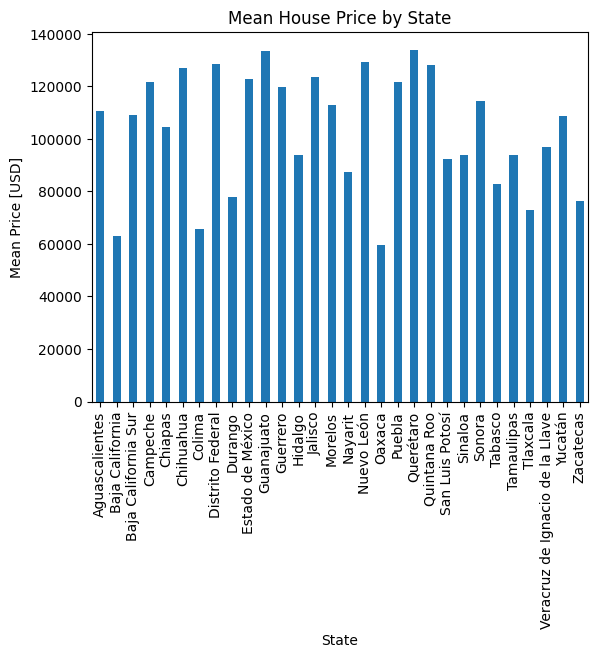

In [107]:
mean_price_by_state.plot(kind="bar",
xlabel="State",
ylabel="Mean Price [USD]",
title="Mean House Price by State");

Price per square meter

In [108]:
# create the "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


Groupy + Bar Chart

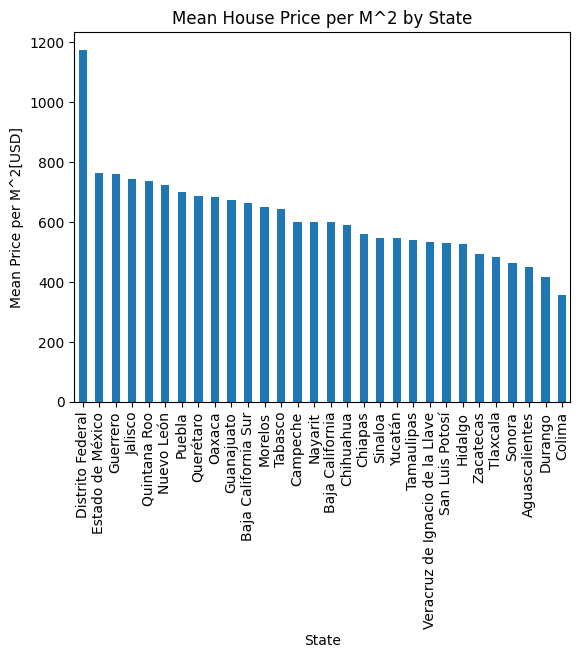

In [109]:
# group df by state, create bar chart of price_per_m2
(
    df.groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
    )
);

#### Research Question 2: Is there a relationship between home size and price?

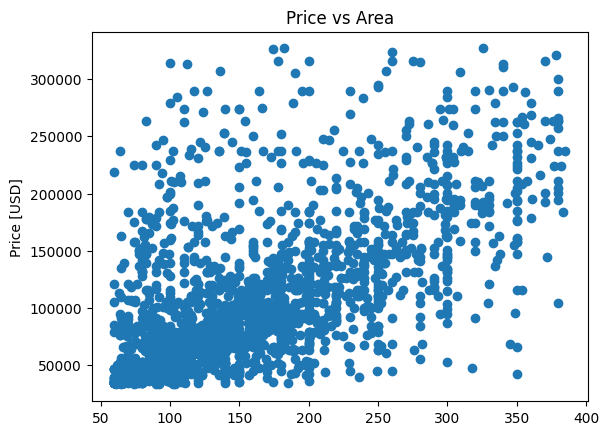

In [110]:
# Price vs area scatter plot
plt.scatter(x=df["area_m2"],y=df["price_usd"])
plt.title("Price vs Area")
plt.ylabel("Price [USD]");

Price vs Area Correlation

In [111]:
p_correlation = round(df["price_usd"].corr(df["area_m2"]), 4)
print("Correlation of 'area_m2' and 'price_us' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_us' (all Mexico): 0.5855


Subset to Morelos

In [113]:
df_morelos = df[df["state"]=="Morelos"]

print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head(10)


df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623
89,house,Morelos,18.942068,-99.242531,290.0,242415.29,835.914793
93,house,Morelos,18.917542,-98.963181,220.0,110641.61,502.916409
107,house,Morelos,18.918608,-98.941094,247.0,142287.24,576.061700
132,house,Morelos,18.903454,-99.056687,145.0,89567.02,617.703586
134,house,Morelos,18.891792,-99.222722,183.0,147557.13,806.323115


Morelos state, Price vs Area Scatter Plot

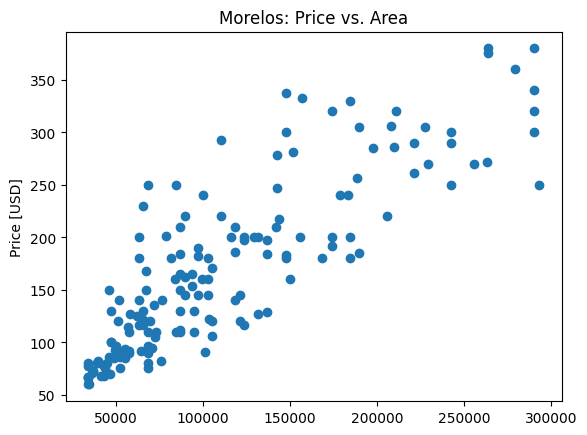

In [118]:
plt.scatter(x=df_morelos["price_usd"], y=df_morelos["area_m2"])
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area");

Morelos, Correlation

In [121]:
p_correlation=round(df_morelos["price_usd"].corr(df_morelos["area_m2"]), 4)

print("Corrlation of 'area_me' and 'price_usd' (Morelos):", p_correlation)

Corrlation of 'area_me' and 'price_usd' (Morelos): 0.8498


Mexico City, Price vs Area

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (179, 7)
Correlation of 'area_m2' and 'price_usd' (Mexi City): 0.6301


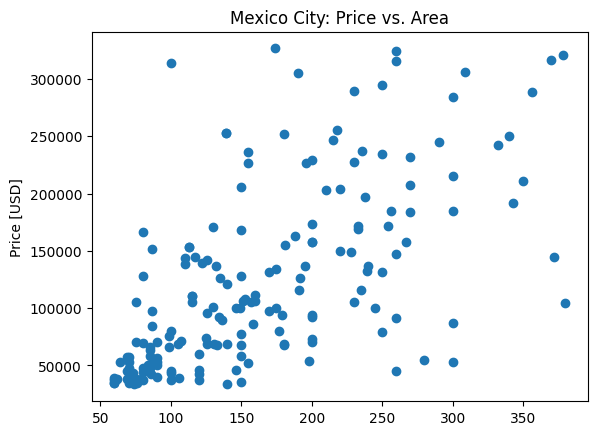

In [136]:
# subset df for Mexico state
df_mexico_city = df[df["state"] == "Estado de México"]

# Object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# A scatter plot of "price_usd" vs "area_m2" 
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"]); #plt.xlabel("Area [sq Meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area");


# Correlation
p_correlation = round(df_mexico_city["price_usd"].corr(df_mexico_city["area_m2"]), 4)
print("Correlation of 'area_m2' and 'price_usd' (Mexi City):", p_correlation)
